# Tutorial: Logistic Regression With Python From Scratch

In this notebook, I've implemented end-to-end binary classification using logistic regression. Here, from scratch, we've written all the required functions like:

* sigmoid()
* cost()
* hyp()
* optim()
* pred()

Here, our goal is not to obtain a high accuracy, rather we'll just implement the cost and optimizer function and see if they works. We've used the pima indiian diabetes datat.

***Give an upvote, if you find the notebook helpful***

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Collection

In [2]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')  # loading the pima indians diabetes dataset

print("Shape of the dataset: " + str(data.shape)) # checking the shape of the dataset 
print("\n \nThe first few rows of the dataset: ") # checking the first few rows of the dataset
data.head()

Shape of the dataset: (768, 9)

 
The first few rows of the dataset: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
n_missing = data.isnull().sum().sum()       # checking if there is any missing value
if n_missing == 0: 
    print("There  is no missing values in the dataset")
else:
    print("Oops! Total " + str(n_missing) + " values in the dataset")


There  is no missing values in the dataset


# Data Analysis

In [4]:
dataset = data.copy() # creating a copy of the dataset, so any further change won't effect the main dataset

for col in dataset.columns[0:-1]: # now, we are normalizing the dataset along columns
    dataset[col] = dataset[col]/abs(dataset[col].max())
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407,1


In [5]:
train, test = train_test_split(dataset, test_size=0.3, random_state=42, shuffle=True) # splitting into train and test set

# Defining Important Functions

In [6]:
# defining "makeinput" function which will extract the features(x) and outcome(y) as np arrays from the dataframe
def makeinput(df_in):
    df = df_in.copy()
    x = df.iloc[:, :-1].values
    y = df.iloc[:, -1]. values
    y = y.reshape(y.shape[0], 1)      # reshape for avoiding broadcasting
    x0 = np.ones(x.shape[0]).reshape(x.shape[0], 1)
    x = np.append(x0, x, axis=1)
    return x, y

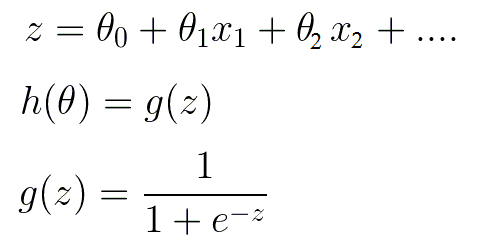

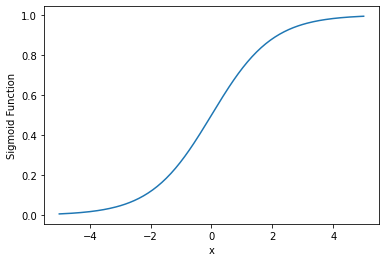

In [7]:
# defining "sigmoid" function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# checking the output of "sigmoid" function
a = np.linspace(-5, 5, 200)
b = sigmoid(a)
plt.plot(a, b)
plt.xlabel("x")
plt.ylabel("Sigmoid Function")
plt.show()    

In [8]:
# defining "hyp" function and it will return the hypothesis 
def hyp(theta, x):
    return np.matmul(x, theta)

Here is the equations for calculating loss:

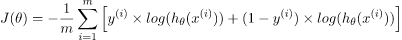

In [9]:
# defining "cost" function, it will return the loss 
def cost(theta, x, y):
    m = x.shape[0]
    h = hyp(theta, x)
    J = -1/(m) * np.sum(y*np.log(sigmoid(h)) + (1-y)*np.log(1-sigmoid(h)))
    return J

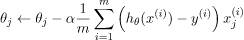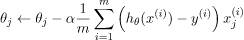

In [10]:
# defining the optimizer

def optim(theta, x, y, alpha, epochs):
    m = x.shape[0]
    j = np.zeros(epochs)
    for i in range(epochs):
        h = hyp(theta,x)
        gd = (1/m)*np.matmul(np.transpose(x), (sigmoid(h)-y))
        theta = theta - alpha*gd 
        j[i] = cost(theta, x, y)
    return theta, j

In [11]:
# "pred" function will predict the hyopothesis for test set
def pred(theta, x): 
    h = hyp(theta, x)
    return sigmoid(h)

# Training

Loss without optimization is 0.6931471805599453
Loss after optimization is 0.4828592404392437


Text(0, 0.5, 'Loss')

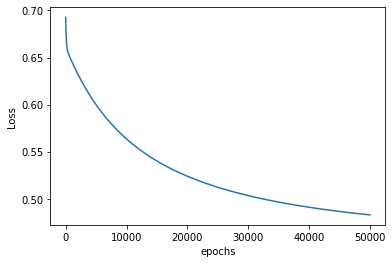

In [12]:
# Initialization of coefficient
x_train, y_train = makeinput(train)
m, n = x_train.shape
theta_init = np.zeros((n, 1))  # initializing theta

# Checking the loss without optimization
loss = cost(theta_init, x_train, y_train)
print("Loss without optimization is " + str(loss))

# Optimization with GD

alpha = 0.01        # learning rate
epochs = 50000       # no of iterations to run the loop
theta, j = optim(theta_init, x_train, y_train, alpha, epochs)
loss_opt = cost(theta, x_train, y_train)

print("Loss after optimization is " + str(loss_opt))
iteration = range(epochs)
plt.plot(iteration, j)
plt.xlabel('epochs')
plt.ylabel('Loss')

# Evaluation

In [13]:
x_test, y_test = makeinput(test)
predictions = np.round(pred(theta, x_test))

print(accuracy_score(y_test, predictions))

0.7748917748917749


**Please give your opinion in the comment section**